# Fashion Mnist Dataset
- Autoencoders.

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

2024-05-18 13:08:23.596153: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 13:08:23.810018: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 13:08:24.855828: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 13:08:27.520372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Functions

In [13]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis="off"

In [14]:
def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(x_valid[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(x_valid[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

## Load data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(full_x_train, full_y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_valid, x_train = full_x_train[:5000]/255., full_x_train[5000:]/255.
y_valid, y_train = full_y_train[:5000], full_y_train[5000:]

## Deep Autoencoder

In [5]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

/home/lara/git/neuralnets_lab/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [11]:
stacked_auto_encoder = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_auto_encoder.compile(loss='binary_crossentropy',
                             optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [16]:
history = stacked_auto_encoder.fit(x_train, x_train, epochs=20,
                                   validation_data=[x_valid, x_valid])

2024-05-18 13:23:29.005402: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2024-05-18 13:23:29.393923: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2848 - val_loss: 0.2817
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2852 - val_loss: 0.2821
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2844 - val_loss: 0.2801
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2842 - val_loss: 0.2862
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2833 - val_loss: 0.2796
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2829 - val_loss: 0.2800
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2828 - val_loss: 0.2786
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2818 - val_loss: 0.2783
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2828 - val_loss: 0.2789
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2811 - val_loss: 0.2779
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2813 - val_loss: 0.2778
Epoch 12/20
1719/1719 ━━━━━━━━

## Reconstruções

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


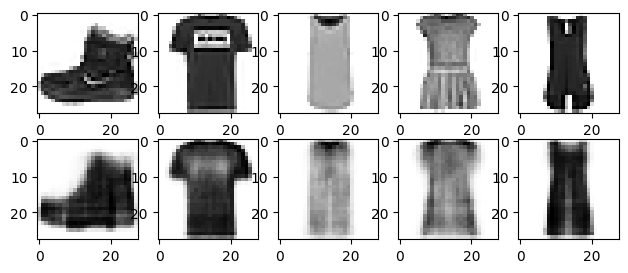

In [15]:
show_reconstructions(stacked_auto_encoder)

## Redução de dimensionalidade

In [18]:
from sklearn.manifold import TSNE

In [19]:
X_valid_compressed = stacked_encoder.predict(x_valid)

tsne = TSNE()

X_valid_2D = tsne.fit_transform(X_valid_compressed)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


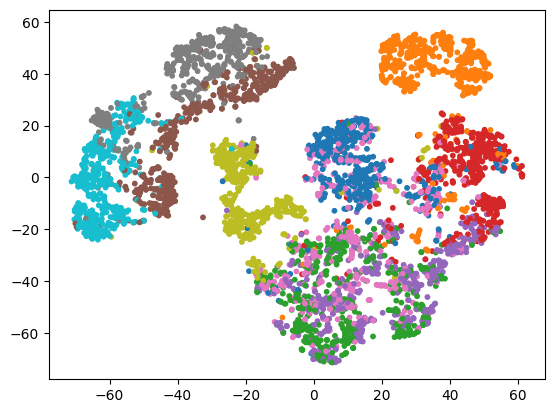

In [25]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()